# Label to Document Mapping & PDF→XML Conversion Workflow

This notebook demonstrates the enhanced `LabelMapper` class that provides comprehensive label analysis and PDF→XML conversion workflow support.

## Key Features:
- **Unique Article Analysis**: Distinguishes between label entries (1,028) and unique articles (523)
- **PDF→XML Conversion Planning**: Identifies articles needing conversion from PDF-only to XML format
- **File Availability Categorization**: Four categories - Both Available, PDF Only, XML Only, Missing Both
- **Enhanced Statistics**: Accurate counts based on unique articles rather than label entries

## Implementation Details:
- **Class location**: `src/label_mapper.py` 
- **Usage location**: Jupyter notebooks in `notebooks/` directory
- **Core functionality**: Label loading, document path mapping, conversion workflow, quality checks


In [1]:
# import dependencies
import sys, os
from pathlib import Path
# get project root
project_root = Path(os.getcwd()).parent

sys.path.append('../src')

from label_mapper import LabelMapper
project_root

PosixPath('/Users/taishajoseph/Documents/Projects/MDC-Challenge-2025')

In [2]:
# Initialize mapper
mapper = LabelMapper(data_dir=os.path.join(project_root, "Data"))

# Load labels
labels_df = mapper.load_labels("train_labels.csv")
labels_df

✅ Loaded 1028 label entries from train_labels.csv
📊 Unique articles: 523
📋 Columns: ['article_id', 'dataset_id', 'type']
📈 Created unique articles summary: 523 unique articles


,article_id,dataset_id,type
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary
1,10.1002_anie.201916483,Missing,Missing
2,10.1002_anie.202005531,Missing,Missing
3,10.1002_anie.202007717,Missing,Missing
4,10.1002_chem.201902131,Missing,Missing
...,...,...,...
1023,10.7717_peerj.12422,https://doi.org/10.15468/dl.t3h8b4,Secondary
1024,10.7717_peerj.12422,https://doi.org/10.15468/dl.yak5vd,Secondary
1025,10.7717_peerj.13193,https://doi.org/10.6073/pasta/02e2764efb408a8b...,Secondary
1026,10.7717_peerj.13193,https://doi.org/10.6073/pasta/275ad28a2f31356c...,Secondary


In [3]:
# Verify unique article count vs total label entries
print(f"📊 Label Entries vs Unique Articles:")
print(f"   Total label entries: {len(labels_df)}")
print(f"   Unique articles: {len(labels_df.article_id.unique())}")
print(f"   Articles with multiple labels: {len(labels_df) - len(labels_df.article_id.unique())}")

# Check the unique articles summary created by the mapper
print(f"\n📈 Unique Articles Summary:")
print(f"   Articles with Primary labels: {mapper.unique_articles_df['has_primary'].sum()}")
print(f"   Articles with Secondary labels: {mapper.unique_articles_df['has_secondary'].sum()}")
print(f"   Articles with Missing labels: {mapper.unique_articles_df['has_missing'].sum()}")
print(f"   Multi-label articles: {len(mapper.unique_articles_df[mapper.unique_articles_df['label_count'] > 1])}")

# Show a sample of multi-label articles
multi_label_articles = mapper.unique_articles_df[mapper.unique_articles_df['label_count'] > 1]
print(f"\n🔍 Sample Multi-label Articles:")
print(multi_label_articles[['article_id', 'label_count', 'label_types']].head())

📊 Label Entries vs Unique Articles:
   Total label entries: 1028
   Unique articles: 523
   Articles with multiple labels: 505

📈 Unique Articles Summary:
   Articles with Primary labels: 167
   Articles with Secondary labels: 57
   Articles with Missing labels: 309
   Multi-label articles: 76

🔍 Sample Multi-label Articles:
                    article_id  label_count           label_types
26            10.1002_mp.14424            2  [Secondary, Primary]
32  10.1007_s00259-022-06053-8            2           [Secondary]
34  10.1007_s00382-022-06361-7            2             [Primary]
39   10.1016_j.ast.2022.107401            2             [Primary]
44  10.1016_j.fuel.2022.125768            2             [Primary]


In [4]:
# Inventory document paths
inventory_df = mapper.inventory_document_paths(pdf_dir="train/PDF", xml_dir="train/XML")
inventory_df

🔍 Scanning directories:
  📁 PDF: /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/Data/train/PDF
  📁 XML: /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/Data/train/XML
📊 Found 524 PDF files and 400 XML files

📋 Document Availability Summary (Unique Articles):
  Total unique articles: 523
  📄 PDFs available: 523 (100.0%)
  🔖 XMLs available: 399 (76.3%)
  📚 Has full-text: 523 (100.0%)

🔄 PDF→XML Conversion Analysis:
  ✅ Both PDF & XML: 399 (76.3%)
  🔄 PDF only (needs conversion): 124 (23.7%)
  📝 XML only: 0 (0.0%)
  ❌ Missing both: 0 (0.0%)


,article_id,label_count,label_types,has_primary,has_secondary,has_missing,dataset_count,pdf_available,pdf_path,xml_available,xml_path,has_fulltext,conversion_status,conversion_priority
0,10.1002_2017jc013030,1,[Primary],True,False,False,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
1,10.1002_anie.201916483,1,[Missing],False,False,True,0,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
2,10.1002_anie.202005531,1,[Missing],False,False,True,0,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
3,10.1002_anie.202007717,1,[Missing],False,False,True,0,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
4,10.1002_chem.201902131,1,[Missing],False,False,True,0,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,10.7554_elife.74937,1,[Primary],True,False,False,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
519,10.7717_peerj.10452,25,"[Secondary, Primary]",True,True,False,25,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
520,10.7717_peerj.11352,1,[Primary],True,False,False,1,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none
521,10.7717_peerj.12422,5,[Secondary],False,True,False,5,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,/Users/taishajoseph/Documents/Projects/MDC-Cha...,True,both_available,none


In [5]:
# PDF→XML Conversion Workflow Analysis
print("🔄 PDF→XML Conversion Workflow Analysis")
print("=" * 50)

# Get conversion summary
conversion_summary = mapper.get_conversion_summary()
print(f"📊 File Availability Summary:")
for key, value in conversion_summary.items():
    if isinstance(value, int):
        percentage = (value / conversion_summary['total_unique_articles']) * 100
        print(f"   {key}: {value} ({percentage:.1f}%)")

print(f"\n🎯 Conversion Workflow Categories:")
print(f"   ✅ Ready for processing: {conversion_summary['both_available'] + conversion_summary['xml_only']} articles")
print(f"   🔄 Need PDF→XML conversion: {conversion_summary['pdf_only']} articles")
print(f"   ❌ Cannot process: {conversion_summary['missing_both']} articles")

# Get articles needing conversion
conversion_candidates = mapper.get_articles_needing_conversion()
print(f"\n📝 Conversion Candidates Preview:")
if len(conversion_candidates) > 0:
    print(conversion_candidates[['article_id', 'label_count', 'has_primary', 'has_secondary', 'conversion_status']].head(10))
else:
    print("   No articles need conversion!")


🔄 PDF→XML Conversion Workflow Analysis
📊 File Availability Summary:
   total_unique_articles: 523 (100.0%)
   both_available: 399 (76.3%)
   pdf_only: 124 (23.7%)
   xml_only: 0 (0.0%)
   missing_both: 0 (0.0%)
   conversion_candidates: 124 (23.7%)
   problematic_articles: 0 (0.0%)

🎯 Conversion Workflow Categories:
   ✅ Ready for processing: 399 articles
   🔄 Need PDF→XML conversion: 124 articles
   ❌ Cannot process: 0 articles
🔄 Found 124 articles needing PDF→XML conversion

📝 Conversion Candidates Preview:
                   article_id  label_count  has_primary  has_secondary  \
19          10.1002_ecs2.1280            1         True          False   
22     10.1002_ejoc.202000139            1        False          False   
24           10.1002_esp.5058            1         True          False   
27         10.1002_nafm.10870            1         True          False   
28    10.1007_jhep07(2018)134            1        False          False   
29    10.1007_jhep11(2018)113            

🔍 Duplicate Analysis:
   ✅ No completely duplicate label entries
   📊 Articles with multiple labels: 505 entries
   📊 Unique articles: 523

🔍 Null value check:
   ✅ article_id: No nulls
   ✅ dataset_id: No nulls
   ✅ type: No nulls

📊 Class Distribution (Label Entries):
   Secondary: 449 (43.7%)
   Missing: 309 (30.1%)
   Primary: 270 (26.3%)

📊 Unique Article Analysis:
   Total unique articles: 523
   Articles with Primary labels: 167
   Articles with Secondary labels: 57
   Articles with Missing labels: 309
   Articles with multiple labels: 76

🎯 Expected vs Actual Distribution:
   ✅ Secondary: Expected 44%, Actual 43.7% (Δ0.3%)
   ✅ Missing: Expected 30%, Actual 30.1% (Δ0.1%)
   ✅ Primary: Expected 26%, Actual 26.3% (Δ0.3%)

✅ All articles have at least one file format available


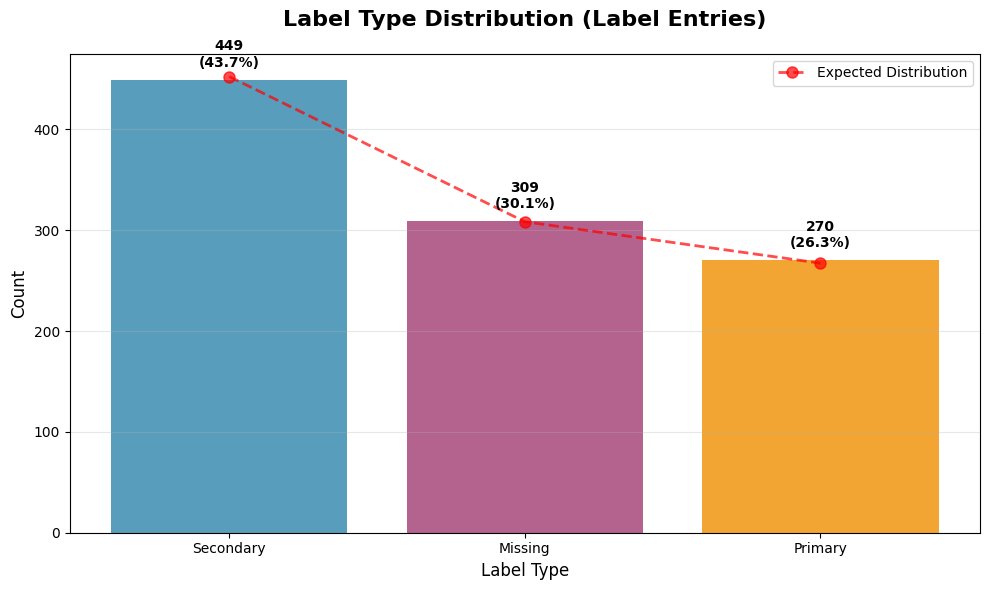

In [6]:
# Conduct quality checks
qc_results = mapper.conduct_basic_checks(show_plots=True)

In [7]:
# Get summary statistics
summary = mapper.get_summary_stats()
print(summary)

{'total_label_entries': 1028, 'unique_articles': 523, 'unique_datasets': 720, 'class_distribution': {'Secondary': 449, 'Missing': 309, 'Primary': 270}, 'articles_with_primary': np.int64(167), 'articles_with_secondary': np.int64(57), 'articles_with_missing': np.int64(309), 'multi_label_articles': 76, 'documents_with_fulltext': np.int64(523), 'pdf_availability': np.int64(523), 'xml_availability': np.int64(399), 'conversion_candidates': 124, 'problematic_articles': 0}


In [8]:
# Enhanced Document Inventory Analysis
print("📋 Document Inventory Analysis")
print("=" * 40)

# File availability by conversion status
print("🔍 Articles by Conversion Status:")
conversion_status_counts = mapper.document_inventory['conversion_status'].value_counts()
for status, count in conversion_status_counts.items():
    percentage = (count / len(mapper.document_inventory)) * 100
    print(f"   {status}: {count} ({percentage:.1f}%)")

print(f"\n📊 Label Type Distribution among Unique Articles:")
label_type_summary = {
    'Primary Only': len(mapper.unique_articles_df[
        (mapper.unique_articles_df['has_primary']) & 
        (~mapper.unique_articles_df['has_secondary']) & 
        (~mapper.unique_articles_df['has_missing'])
    ]),
    'Secondary Only': len(mapper.unique_articles_df[
        (~mapper.unique_articles_df['has_primary']) & 
        (mapper.unique_articles_df['has_secondary']) & 
        (~mapper.unique_articles_df['has_missing'])
    ]),
    'Missing Only': len(mapper.unique_articles_df[
        (~mapper.unique_articles_df['has_primary']) & 
        (~mapper.unique_articles_df['has_secondary']) & 
        (mapper.unique_articles_df['has_missing'])
    ]),
    'Multiple Labels': len(mapper.unique_articles_df[mapper.unique_articles_df['label_count'] > 1])
}

for label_type, count in label_type_summary.items():
    percentage = (count / len(mapper.unique_articles_df)) * 100
    print(f"   {label_type}: {count} ({percentage:.1f}%)")

# Show conversion priority by label type
print(f"\n🎯 Conversion Priority by Label Type:")
priority_analysis = mapper.document_inventory.groupby(['conversion_status']).agg({
    'has_primary': 'sum',
    'has_secondary': 'sum', 
    'has_missing': 'sum',
    'article_id': 'count'
}).round(2)
priority_analysis

📋 Document Inventory Analysis
🔍 Articles by Conversion Status:
   both_available: 399 (76.3%)
   pdf_only: 124 (23.7%)

📊 Label Type Distribution among Unique Articles:
   Primary Only: 157 (30.0%)
   Secondary Only: 47 (9.0%)
   Missing Only: 309 (59.1%)
   Multiple Labels: 76 (14.5%)

🎯 Conversion Priority by Label Type:


,has_primary,has_secondary,has_missing,article_id
conversion_status,,,,
both_available,128,49,230,399
pdf_only,39,8,79,124


In [9]:
# Export conversion workflow files
print("📝 Exporting Conversion Workflow Files")
print("=" * 40)

# Export conversion candidates for PDF→XML workflow
mapper.export_conversion_candidates("conversion_candidates.csv")

# Export problematic articles (missing both PDF & XML)
mapper.export_missing_files("problematic_articles.txt")

# Get file statistics for reporting
file_stats = mapper.get_file_statistics()
print(f"\n📊 File Statistics Summary:")
print(f"   Ready for processing: {file_stats['conversion_workflow']['ready_for_processing']} articles")
print(f"   Need conversion: {file_stats['conversion_workflow']['needs_conversion']} articles") 
print(f"   Cannot process: {file_stats['conversion_workflow']['cannot_process']} articles")

📝 Exporting Conversion Workflow Files
🔄 Found 124 articles needing PDF→XML conversion
📝 Exported 124 conversion candidates to /Users/taishajoseph/Documents/Projects/MDC-Challenge-2025/Data/conversion_candidates.csv
✅ No articles missing both PDF and XML files

📊 File Statistics Summary:
   Ready for processing: 399 articles
   Need conversion: 124 articles
   Cannot process: 0 articles


## Integration with PDF→XML Conversion Pipeline

The enhanced `LabelMapper` now provides perfect integration with the selective PDF→XML conversion workflow described in the preprocessing guide:

### Key Outputs for Next Steps:

1. **`conversion_candidates.csv`** - Articles needing PDF→XML conversion (124 articles)
2. **`problematic_articles.txt`** - Articles missing both formats (0 articles) 
3. **Accurate statistics** based on unique articles rather than label entries

### Workflow Integration:

- **Step 4.1**: Use `mapper.get_articles_needing_conversion()` to identify conversion targets
- **Step 4.2**: Use existing XML inventory from `mapper.document_inventory` 
- **Step 4.3**: Export conversion candidates with `mapper.export_conversion_candidates()`
- **Step 4.4**: Monitor conversion progress with file availability statistics

This eliminates the need for manual file counting and provides precise conversion workflow planning.


In [10]:
# Demonstrate Conversion Workflow Usage
print("🔧 Conversion Workflow Usage Example")
print("=" * 45)

# Get conversion candidates for processing
conversion_candidates = mapper.get_articles_needing_conversion()

print(f"📋 Conversion Candidates Summary:")
print(f"   Total articles needing conversion: {len(conversion_candidates)}")
print(f"   Articles with Primary labels: {conversion_candidates['has_primary'].sum()}")
print(f"   Articles with Secondary labels: {conversion_candidates['has_secondary'].sum()}")
print(f"   Priority candidates (with Primary/Secondary): {conversion_candidates[conversion_candidates['has_primary'] | conversion_candidates['has_secondary']].shape[0]}")

print(f"\n📁 Sample PDF Paths for Conversion:")
sample_paths = conversion_candidates['pdf_path'].head(5).tolist()
for i, path in enumerate(sample_paths, 1):
    article_id = Path(path).stem
    print(f"   {i}. {article_id}")

# Verify integration with preprocessing pipeline
print(f"\n✅ Ready for Selective PDF→XML Conversion Pipeline!")
print(f"   Use the exported 'conversion_candidates.csv' file")
print(f"   {conversion_summary['both_available']} articles already have XML files")
print(f"   {conversion_summary['pdf_only']} articles need PDF→XML conversion")
print(f"   {conversion_summary['total_unique_articles']} total unique articles to process")


🔧 Conversion Workflow Usage Example
🔄 Found 124 articles needing PDF→XML conversion
📋 Conversion Candidates Summary:
   Total articles needing conversion: 124
   Articles with Primary labels: 39
   Articles with Secondary labels: 8
   Priority candidates (with Primary/Secondary): 45

📁 Sample PDF Paths for Conversion:
   1. 10.1002_ecs2.1280
   2. 10.1002_ejoc.202000139
   3. 10.1002_esp.5058
   4. 10.1002_nafm.10870
   5. 10.1007_jhep07(2018)134

✅ Ready for Selective PDF→XML Conversion Pipeline!
   Use the exported 'conversion_candidates.csv' file
   399 articles already have XML files
   124 articles need PDF→XML conversion
   523 total unique articles to process
